<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Class_Log_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Работает только для линейно разделимых данных, так как внутри не имеет методов для kernel trick!



In [ ]:
# импорт
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# создание данных
X_blob, y_blob       = datasets.  make_blobs(n_samples=60,
                                             n_features=2,
                                             centers=3,
                                             cluster_std=4,
                                             random_state=42)

X_circles, y_circles = datasets.make_circles(n_samples=100,
                                             noise=0.25,
                                             factor=0.3,
                                             random_state=42)

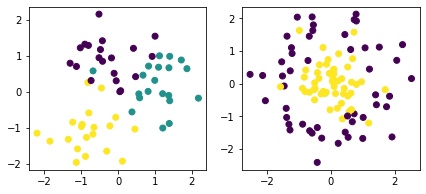

In [ ]:
# стандартизация и печать
scaler        = StandardScaler()
X_blob_std    = scaler.fit_transform(X_blob)
X_circles_std = scaler.fit_transform(X_circles)

plt.figure(figsize=(7, 3))
plt.subplot(121)
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob)
plt.subplot(122)
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles);

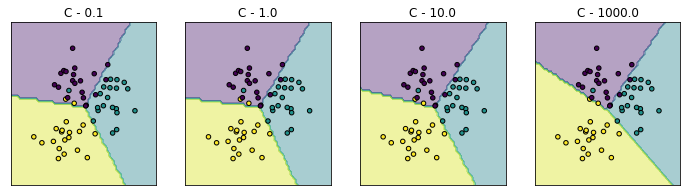

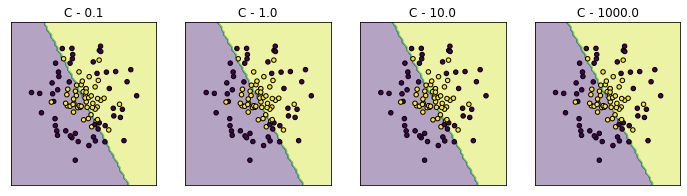

In [ ]:
# заготовка под словарь коэффициентов
coef_l2 = {}
# размер С, чем выше тем больше штраф
c_list = [0.1, 1, 10, 1000]
# обучение и печать результатов
for ind, data in enumerate([(X_blob_std, y_blob),
                            (X_circles_std, y_circles)]):
  # холст
  plt.figure(figsize=(12, 3))
  for ind_, c in enumerate(c_list):
    # обучение простой лог регрессии
    log_reg = LogisticRegression(penalty='l2',       # вид регуляризации 
                                C=c,                 # значение штрафа
                                solver='lbfgs',      # 'sag' для больших данных  
                                class_weight=None,   # классы сбалансированны 
                                multi_class='ovr',   # один против остальных
                                random_state=42)
    log_reg.fit(data[0], data[1])
    coef_l2[c]= log_reg.coef_
    # печать
    # субплот 1 строка 4 колонки
    plt.subplot(1, 4, ind_+1)
    # настройка минимума и максимума для создания поля с точками
    x_min, x_max = data[0][:, 0].min()-1, data[0][:, 0].max()+1
    y_min, y_max = data[0][:, 1].min()-1, data[0][:, 1].max()+1
    # поле с точками для классификации с шагом 0,1 между точками
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    # предикты для этого поля
    Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # окраска поля по контуру классов из предикта
    plt.contourf(xx, yy, Z, alpha=0.4)
    # вывод оригинального датасета с истинными метками
    plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1],
                s=20,            # диаметр точек
                edgecolors='k')  # цвет окантовки точек
    plt.title(f'C - {c:.1f}')
    plt.xticks([])
    plt.yticks([])

plt.show()

In [ ]:
# видно что С влияет на границу решения - чем с выше, тем стожнее линия
# также видно что кольца совершенно не разделились на классы
# вывод коэффициентов
for k in coef_l2.keys():
  print(f'{k} - {coef_l2[k][0][0]:.3f}, {coef_l2[k][0][1]:.3f}')

0.1 - 0.047, 0.030
1 - 0.064, 0.041
10 - 0.067, 0.042
1000 - 0.067, 0.042


In [ ]:
# сравним с результатом при применении l1 нормы
# заготовка под словарь коэффициентов
coef_l1 = {}
# размер С, чем выше тем больше штраф
c_list = [0.1, 1, 10, 1000]
# обучение и печать результатов
for ind, data in enumerate([(X_blob_std, y_blob)]):
  for ind_, c in enumerate(c_list):
    # обучение простой лог регрессии
    log_reg = LogisticRegression(penalty='l1',       # вид регуляризации 
                                C=c,                 # значение штрафа
                                solver='liblinear',  # только этот с l1!
                                class_weight=None,   # классы сбалансированны 
                                multi_class='ovr',   # один против остальных
                                random_state=42)
    log_reg.fit(data[0], data[1])
    coef_l1[c]= log_reg.coef_
# вывод коэффициентов
for k in coef_l1.keys():
  print(f'{k} - {coef_l1[k][0][0]:.3f}, {coef_l1[k][0][1]:.3f}')

0.1 - 0.000, 0.575
1 - -1.257, 2.584
10 - -1.816, 3.573
1000 - -1.912, 3.750


In [ ]:
# тут видна разница l1 и l2 - квадратичный штраф стремится занизить коэффициенты
# при этом не снижая их до нуля, в то время как l1 может обнулить
# но сами значения коэф полученные от лог регрессии нельзя напрямую 
# интерпретировать!